In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
from tbparse import SummaryReader
import torch
os.chdir('../')
print(os.getcwd())

/Users/gbemidebe/Documents/GitHub/knnGuidedDesign


In [4]:
from src.data.loader import load_auto_hp_params
from src.viz.plotters import Parallel_Coordinates

In [5]:
!pwd

/Users/gbemidebe/Documents/GitHub/knnGuidedDesign


In [14]:
log_dir = "reports/lightning_logs/knnMoleculeVAE/version_1/"
reader = SummaryReader(log_dir, pivot=True)
df = reader.scalars
df

,step,epoch,hp_metric,train_loss_epoch,train_loss_step,val_loss_epoch,val_loss_step
0,0,NaN,-1.0,NaN,NaN,NaN,10809.890625
1,1,NaN,NaN,NaN,NaN,NaN,9811.266602
2,2,NaN,NaN,NaN,NaN,NaN,10819.225586
3,3,NaN,NaN,NaN,NaN,NaN,9819.029297
4,4,NaN,NaN,NaN,NaN,NaN,10819.308594
...,...,...,...,...,...,...,...
847,2367,"[295.0, 295.0]",NaN,1023.825195,NaN,935.030273,NaN
848,2375,"[296.0, 296.0]",NaN,1033.995483,NaN,948.960938,NaN
849,2383,"[297.0, 297.0]",NaN,1024.336548,NaN,940.963379,NaN
850,2391,"[298.0, 298.0]",NaN,1014.230957,NaN,924.786743,NaN


In [8]:
# batch_size: 64
# dec_hidden_dim_1: 32
# dec_hidden_dim_2: 32
# device: !!python/object:pytorch_lightning.accelerators.mps.MPSAccelerator {}
# dropout: 0.0
# enc_hidden_dim_1: 32
# enc_hidden_dim_2: 32
# learning_rate: 0.0001
# num_epochs: 250
# seed: 42
# split: 0.2

In [21]:
hpp_df = load_auto_hp_params("reports/lightning_logs/knnMoleculeVAE/version_0")

run_0 has 1291 epochs
{'batch_size': 64, 'dec_hidden_dim_1': 32, 'dec_hidden_dim_2': 32, 'device': 'mps', 'dropout': 0.0, 'enc_hidden_dim_1': 32, 'enc_hidden_dim_2': 32, 'learning_rate': 0.0001, 'num_epochs': 250, 'seed': 42, 'split': 0.2}


ZeroDivisionError: float division by zero

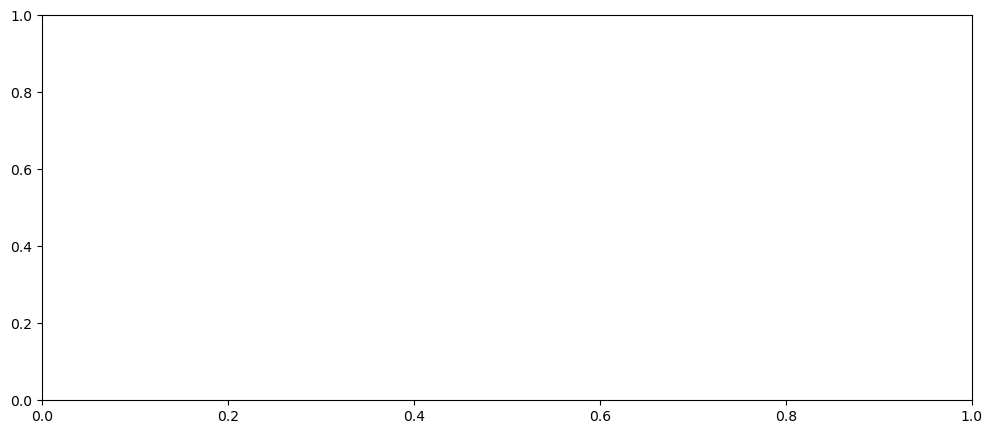

In [23]:
fig,ax = plt.subplots(figsize=(12,5))
pcd = Parallel_Coordinates(df=hpp_df, best_itr=45,ax=ax).plot()
plt.tight_layout()
# plt.savefig("images/hyperparams.png", dpi=200, facecolor='w', edgecolor='none',bbox_inches='tight')
# plt.show()